<a href="https://colab.research.google.com/github/Mejdv2/Numpy-Python-AI-/blob/main/NumpyAi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This Imports the Essential Libraries and some other functions (such as activation functions and their derivatives, cost functions, etc).

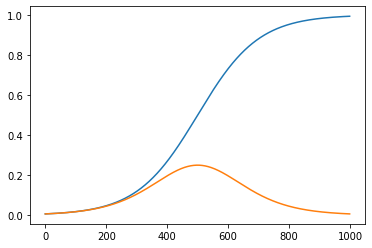

In [14]:
import numpy as np
import matplotlib.pyplot as plt


#"""Activation Functions"""


class SigmoidActFunc():
    def __init__(self):
        pass

    def Activation(self, z):
        return 1 / (1 + np.exp(-z))

    def Derivative(self, z):
        return self.Activation(z) * (1 - self.Activation(z))


class TanHActFunc():
    def __init__(self):
        pass

    def Activation(self, z):
        e2z = np.exp(2 * z)
        return (e2z - 1) / (e2z + 1)

    def Derivative(self, z):
        a = self.Activation(z)
        return 1 - a **2


class SiLUActFunc():
    def __init__(self):
        pass

    def Activation(self, z):
        return z / (1 + np.exp(-z))

    def Derivative(self, z):
        sig = 1 / (1 + np.exp(-z))
        return z * sig * (1 - sig) + sig



class LinActFunc():
    def __init__(self):
        pass

    def Activation(self, z):
        return z

    def Derivative(self, z):
        return np.ones(z.shape)



class ReLUActFunc():
    def __init__(self):
        pass

    def Activation(self, z):

        return np.maximum(z, np.zeros(z.shape))

    def Derivative(self, z):
        FlatZ = z.flatten()
        ToRet = np.zeros(FlatZ.shape)

        for zEl in range(z.size):
            if FlatZ[zEl] > 0:
                ToRet[zEl] = 1

        return ToRet.reshape(z.shape)



class PReLUActFunc():
    def __init__(self):
        pass

    def Activation(self, z):

        return np.maximum(z, z * 0.05)

    def Derivative(self, z):
        FlatZ = z.flatten()
        ToRet = np.zeros(FlatZ.shape) + 0.05

        for zEl in range(FlatZ.size):
            if FlatZ[zEl] > 0:
                ToRet[zEl] = 1

        return ToRet.reshape(z.shape)




class SoftmaxActFunc():
    def __init__(self):
        pass

    def Activation(self, z):
        expSum = np.sum(z, 1)

        return np.array([z[i] / expSum[i] for i in range(len(expSum))])

    def Derivative(self, z):
        expSum   = np.sum(z, 1)
        expIn    = z
        nNpA = [(expIn[i] * expSum[i] - expIn[i] ** 2) / (expSum[i] ** 2) for i in range(len(expSum))]

        return np.array(nNpA)




#"""ERROR FUNCTIONS"""



class MeanSquaredErrorCostFunc():
    def __init__(self):
        pass

    def Cost(self, Output, Expected):
        return (Output - Expected) **2

    def Derivative(self, Output, Expected):
        return 2 * (Output - Expected)
    

class CrossEntropy():
    def __init__(self):
        pass

    def Cost(predictions, targets):
        """
        Computes cross entropy between targets (encoded as one-hot vectors)
        and predictions. 
        Input: predictions (N, k) ndarray
               targets (N, k) ndarray        
        Returns: scalar
        """
 
        ce = -np.sum(targets*np.log2(predictions+1e-12))
        return ce




#"""TRAINING FUNCTIONS"""




class SGD():
    def __init__(self, LrW, LrB, Momentum = 0.0):
        self.LrWeight = LrW
        self.LrBias   = LrB
        self.Momentum = Momentum

    def CalcGrad(FSelf, self, PrevLayer):
        self.Backproped      = np.array([self.weights.dot(self.NodeValues[0])])

        self.WeightGradiant += np.dot(PrevLayer.Activations.T, self.NodeValues)
        self.BiasGradiant   += np.sum(self.NodeValues, 0)

        return self

    def AppGrad(FSelf, self, DataSize):
        self.biases  -= self.BiasGradiant   * (FSelf.LrBias / DataSize)
        self.weights -= self.WeightGradiant * (FSelf.LrWeight / DataSize)

        self.biases  -= self.BiasOld * FSelf.Momentum
        self.weights -= self.WeightOld   * FSelf.Momentum

        self.WeightOld       = self.WeightGradiant * (FSelf.LrWeight / DataSize)
        self.BiasOld         = self.BiasGradiant   * (FSelf.LrBias / DataSize)

        self.BiasGradiant    = np.zeros((1, self.NumOutNodes))
        self.WeightGradiant  = np.zeros((self.NumInNodes, self.NumOutNodes))

        return self

Sigmoid = SigmoidActFunc()
Linear  = LinActFunc()
PReLU   = PReLUActFunc()
ReLU    = ReLUActFunc()
TanH    = TanHActFunc()
SiLU    = SiLUActFunc()
Softmax = SoftmaxActFunc()

MeanSquaredError = MeanSquaredErrorCostFunc()


x = Sigmoid.Activation(np.array([x/100 for x in range(-500, 500, 1)]))
y = Sigmoid.Derivative(np.array([x/100 for x in range(-500, 500, 1)]))

plt.plot(x)
plt.plot(y)



plt.show()

Imports tensorflow to load mnist dataset. then unload it.

In [ ]:
import tensorflow as tf

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

x_train = x_train.reshape(60000, 784)/255
x_test  = x_test.reshape(10000, 784)/255

print(x_train.shape)


del tf

11490434/11490434 [==============================] - 0s 0us/step
(60000, 784)


Next is formatting the output.

In [ ]:
convertedY = np.zeros((60000, 10))


for i in range(len(y_train)):
    currUpdate = y_train[i]
    toOut = np.zeros(10)
    toOut[currUpdate] = 1
    convertedY[i] = toOut

y_train = convertedY[0:60000]

In [ ]:
convertedY = np.zeros((10000, 10))


for i in range(len(y_test)):
    currUpdate = y_test[i]
    toOut = np.zeros(10)
    toOut[currUpdate] = 1
    convertedY[i] = toOut

y_test = convertedY

Next is the layer class definition. We randomly define weights based off of the previous layer size and the current layer size. The -**self.Activations**- variable is used during feedforward to pass its values to the next layer. then we use it with  the **np.dot** function to feedforward it with the current weights, After that bias is added then the variable is activated and passed and so on.

****NOTE:**** The first layer (Input Layer) does not dot its activation with the weights because it has no weights nor biases.

In [7]:
class Layer():
    def __init__(self, NumNodes, Activation, BackProper):
        self.NumOutNodes    = NumNodes
        self.NumInNodes     = 1

        self.ActFunc        = Activation.Activation
        self.DerFunc        = Activation.Derivative

        self.BPCalc         = BackProper
        self.WeightOld      = np.zeros((self.NumInNodes, NumNodes))
        self.BiasOld        = np.zeros((1, NumNodes))


        self.Activations    = np.zeros((1, NumNodes))
        self.WeightedOut    = np.zeros((1, NumNodes))
        self.Backproped     = np.zeros((1, NumNodes))
        self.NodeValues     = np.zeros((1, NumNodes))
        self.WeightGradiant = np.zeros((self.NumInNodes, NumNodes))
        self.BiasGradiant   = np.zeros((1, NumNodes))

        self.weights        = np.random.uniform(size = (self.NumInNodes, self.NumOutNodes)) / np.sqrt(self.NumInNodes)
        self.biases         = np.zeros((1,              self.NumOutNodes))

    def Update_InputDim(self, NumNodesIn):
        self.NumInNodes = NumNodesIn

        
        self.weights = np.random.uniform(size = (self.NumInNodes, self.NumOutNodes)) / np.sqrt(self.NumInNodes)
        self.WeightGradiant = np.zeros((self.NumInNodes, self.NumOutNodes))

    def FeedForward(self, PrevLayer):
        PrevLayerAct = PrevLayer.Activations

        WeightedOut = np.dot(PrevLayerAct, self.weights)
        InactiveOut = np.add(WeightedOut,  self.biases)

        ActOutPut   = self.ActFunc(InactiveOut)

        self.WeightedOut = InactiveOut
        self.Activations = ActOutPut


    #Now It's Time For BACKPROPOGATION!


    def BackPropLayer(self, PrevLayer, NextLayer):
        self.NodeValues  = NextLayer.Backproped
        self.NodeValues *= self.DerFunc(self.WeightedOut)

        self = self.BPCalc.CalcGrad(self, PrevLayer)

    def ApplyGradiants(self, DataSize):
        self = self.BPCalc.AppGrad(self, DataSize)

In the above script, you can see that we need the next layer. This is because in each layer, we calculate the previous layer's node values. The weights' gradiant is adjusted by the previous layers activation (for input layer that's just the input) multiplied by the new node values. The bias's gradiant on the other hand are adjusted based off of the new node values.

In [8]:
class OutputLayer():
    def __init__(self, NumNodes, Activation, Cost, BackProper):
        self.NumOutNodes    = NumNodes
        self.NumInNodes     = 1

        self.ActFunc        = Activation.Activation
        self.DerFunc        = Activation.Derivative

        self.CostFunc       = Cost.Cost
        self.CostDerivative = Cost.Derivative

        self.BPCalc         = BackProper
        self.WeightOld      = np.zeros((self.NumInNodes, NumNodes))
        self.BiasOld        = np.zeros((1, NumNodes))

        self.Activations    = np.zeros((1, NumNodes))
        self.WeightedOut    = np.zeros((1, NumNodes))
        self.Backproped     = np.zeros((1, NumNodes))
        self.NodeValues     = np.zeros((1, NumNodes))
        self.BiasGradiant   = np.zeros((1, NumNodes))

        
        self.weights     = np.random.uniform(size = (self.NumInNodes, self.NumOutNodes)) / np.sqrt(self.NumInNodes)
        self.biases         = np.zeros((1, self.NumOutNodes))

    def Update_InputDim(self, NumNodesIn):
        self.NumInNodes = NumNodesIn

        self.weights     = np.random.uniform(size = (self.NumInNodes, self.NumOutNodes)) / np.sqrt(self.NumInNodes)
        self.WeightGradiant = np.zeros((self.NumInNodes, self.NumOutNodes))
        self.biases         = np.zeros((1, self.NumOutNodes))

    def FeedForward(self, PrevLayer):
        PrevLayerAct = PrevLayer.Activations

        WeightedOut = np.dot(PrevLayerAct, self.weights)
        InactiveOut = np.add(WeightedOut,  self.biases)

        ActOutPut   = self.ActFunc(InactiveOut)

        self.WeightedOut = InactiveOut
        self.Activations = ActOutPut


    #Now It's Time For BACKPROPOGATION!


    def CalculateNodeValues(self, ExpectedOut):
        CurrentOut     = self.Activations
        WeightedOutput = self.WeightedOut

        CostDerivative   = self.CostDerivative(CurrentOut, ExpectedOut)
        OutputDerivative = self.DerFunc(WeightedOutput)

        NodeValue = CostDerivative * OutputDerivative
        return NodeValue

    def BackPropOutput(self, ExpectedOutput, PrevLayer):
        self.NodeValues      = self.CalculateNodeValues(ExpectedOutput)
        self = self.BPCalc.CalcGrad(self, PrevLayer)

    def ApplyGradiants(self, DataSize):
        self = self.BPCalc.AppGrad(self, DataSize)

As you might have noticed in the 
Backpropagation/Gradiant Descent section, we use a cost/loss function to calculate the error. this is to figure out how much we should change the node values and how much of an effect does each weight has on the error and how to decrease the error. The new value each of the weights' gradiant is equal to the new node values multiplied by the previous layers activations. The bias's gradiant is adjusted based off of the new node values.

In [2]:
class InputLayer():
    def __init__(self, NumNodes):
        self.NumOutNodes = NumNodes

        self.Activations = np.zeros((1, NumNodes))

    def ApplyGradiants(self, DataSize):
        pass

In [3]:
class NeuralNetwork():
    def __init__(self):
        self.layers = []

    def Add_Layer(self, Layer):
        LayerAdd = Layer

        if len(self.layers) > 0:
            LayerAdd.Update_InputDim(self.layers[-1].NumOutNodes)

        self.layers.append(LayerAdd)

    def Predict(self, Input):
        if len(self.layers) < 1:
            raise ValueError("No Layers Found In Neural Network!")

        if len(self.layers) > 0:
            self.layers[0].Activations = Input

        if len(self.layers) > 1:
            for LayerIndex in range(1, len(self.layers), 1):
                self.layers[LayerIndex].FeedForward(self.layers[LayerIndex - 1])

        return self.layers[-1].Activations

    def BackProp(self, Inputs, Outputs):
        if len(self.layers) < 2:
            raise ValueError("Not Enough Layers In Neural Network! (Two Required for Training!)")

        self.Predict(Inputs)

        self.layers[-1].BackPropOutput(Outputs, self.layers[-2])

        if len(self.layers) > 2:
            for LayerIndex in range(1, len(self.layers) - 1, -1):
                self.layers[LayerIndex].BackPropLayer(self.layers[LayerIndex - 1], self.layers[LayerIndex + 1])

    def ApplyAllGradiants(self, DatasetSize):
        for i in range(len(self.layers)):
            self.layers[i].ApplyGradiants(DatasetSize)

    def CalcCost(self, Input, ExpectedOutput):
        CostFunc = self.layers[-1].CostFunc

        Output = self.Predict(Input)
        return np.sum(CostFunc(Output, ExpectedOutput))

    def CalcCosts(self, Inputs, ExpectedOutputs):
        Costs = [self.CalcCost(Input, Output) for Input, Output in zip(Inputs, ExpectedOutputs)]

        return np.sum(Costs) / len(Inputs)

****Test Time!****

In [25]:

TM = SGD(0.5, 0.2, 0)

Neural = NeuralNetwork()
Neural.Add_Layer(InputLayer(2))

Neural.Add_Layer(Layer(3, TanH, TM))
Neural.Add_Layer(Layer(3, TanH, TM))

Neural.Add_Layer(OutputLayer(2, Sigmoid, MeanSquaredError, TM))

InputsX  = np.array([[1, 1], [1, 2], [2, 1], [1.8, 1.8],
 [2, 2], [2.4, 3.2], [2.6, 2.8], [3, 3]])
OutputsY = np.array([[0, 1], [0, 1], [0, 1], [0, 1],
     [1, 0], [1, 0],   [1, 0], [1, 0]])

print(Neural.Predict(InputsX))

[[0.59798467 0.58995246]
 [0.61574093 0.60467048]
 [0.61360432 0.6033528 ]
 [0.6199483  0.60833722]
 [0.62217114 0.6101578 ]
 [0.62637205 0.6135757 ]
 [0.62605381 0.61332954]
 [0.6267148  0.61388084]]


In [28]:
print(Neural.CalcCosts(InputsX, OutputsY))

for i in range(100000):
    Neural.BackProp(InputsX, OutputsY)
    Neural.ApplyAllGradiants(8)
    
print(Neural.CalcCosts(InputsX, OutputsY))

x = np.argmax(Neural.Predict(InputsX), 1)

0.09268102178087703
0.07269924238410425


In [29]:
print(x)

print(Neural.Predict(InputsX))

[1 1 1 1 0 0 0 0]
[[2.57667940e-05 9.99974164e-01]
 [6.66980357e-02 9.33284026e-01]
 [3.53816849e-02 9.64581979e-01]
 [3.81510975e-01 6.18459351e-01]
 [6.44320836e-01 3.55694831e-01]
 [9.34375846e-01 6.56491515e-02]
 [9.24611483e-01 7.54142954e-02]
 [9.45008069e-01 5.50129028e-02]]


Now It's Time For the Big Test!

In [31]:
TM = SGD(0.2, 0.2, 0)

np.random.seed(4)

nn = NeuralNetwork()

nn.Add_Layer(InputLayer(1))

nn.Add_Layer(OutputLayer(1, Linear, MeanSquaredError, TM))


x = np.random.normal(size=(100000, 1))

print(x.shape)

y = x * 2.55 + 3

print(nn.CalcCosts(x, y))

for i in range(10000):
    nn.BackProp(x, y)
    nn.ApplyAllGradiants(100000)

print(nn.CalcCosts(x, y))

print(nn.layers[-1].weights)
print(nn.layers[-1].biases)

print(nn.Predict(-1))

(100000, 1)
12.966660253851986
5.21165887414919e-31
[[2.55]]
[[3.]]
[[0.45]]


Discard The Rest, i havent implemented Cross Entropy and A descent softmax yet.

In [ ]:
NeuralT = NeuralNetwork()
NeuralT.Add_Layer(InputLayer(784))

NeuralT.Add_Layer(Layer(50, Sigmoid, 5, 0.25))
# NeuralT.Add_Layer(Layer(216, Sigmoid, 0.5, 0.0025))

NeuralT.Add_Layer(OutputLayer(10, Sigmoid, MeanSquaredError, 5, 0.25))

In [ ]:
print(NeuralT.CalcCosts(x_train, y_train))

for i in range(10):
    NeuralT.BackProp(x_train, y_train)
    NeuralT.ApplyAllGradiants(10000)
    


print(NeuralT.CalcCosts(x_train, y_train))

print(np.argmax(NeuralT.Predict(x_train[1])))

print(np.argmax(y_train[1]))

In [ ]:

print(np.argmax(NeuralT.Predict(x_train[10])))

print(np.argmax(y_train[10]))